In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
colors = ['#bcbcbc', 'r']
textprops = {'fontsize': 12, 'fontweight': 'bold'}

Load Data into Dataframe

In [2]:
df = pd.read_csv('data01.csv')
df.head()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


In [3]:
df.columns

Index(['group', 'ID', 'outcome', 'age', 'gendera', 'BMI', 'hypertensive',
       'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF'],
      dtype='object')

In [4]:
df.isnull().any()

group                       False
ID                          False
outcome                      True
age                         False
gendera                     False
BMI                          True
hypertensive                False
atrialfibrillation          False
CHD with no MI              False
diabetes                    False
deficiencyanemias           False
depression                  False
Hyperlipemia                False
Renal failure               False
COPD                        False
heart rate                   True
Systolic blood pressure      True
Diastolic blood pressure     True
Respiratory rate             True
temperature                  True
SP O2                        True
Urine output                 True
hematocrit                  False
RBC                         False
MCH                         False
MCHC                        False
MCV                         False
RDW                         False
Leucocyte                   False
Platelets     

In [5]:
df.describe()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
count,1177.000000,1177.000000,1176.000000,1177.000000,1177.000000,962.000000,1177.000000,1177.000000,1177.000000,1177.000000,...,1177.000000,1176.000000,1177.000000,1177.000000,1177.000000,885.000000,1177.000000,948.000000,883.000000,1177.000000
mean,1.299065,150778.120646,0.135204,74.055225,1.525064,30.188278,0.717927,0.451147,0.085811,0.421410,...,138.890016,8.500894,102.283835,13.925094,2.120169,7.378532,26.911766,1.853426,45.535382,48.715378
std,0.458043,29034.669513,0.342087,13.434061,0.499584,9.325997,0.450200,0.497819,0.280204,0.493995,...,4.151347,0.572263,5.339733,2.652732,0.251532,0.067320,5.167512,0.983819,12.711271,12.868436
min,1.000000,100213.000000,0.000000,19.000000,1.000000,13.346801,0.000000,0.000000,0.000000,0.000000,...,114.666667,6.700000,80.266667,6.636364,1.400000,7.090000,12.857143,0.500000,18.750000,15.000000
25%,1.000000,125603.000000,0.000000,65.000000,1.000000,24.326461,0.000000,0.000000,0.000000,0.000000,...,136.666667,8.148864,99.000000,12.250000,1.955556,7.334615,23.454545,1.200000,37.038462,40.000000
50%,1.000000,151901.000000,0.000000,77.000000,2.000000,28.312474,1.000000,0.000000,0.000000,0.000000,...,139.250000,8.500000,102.500000,13.666667,2.092308,7.380000,26.500000,1.600000,43.000000,55.000000
75%,2.000000,176048.000000,0.000000,85.000000,2.000000,33.633509,1.000000,1.000000,0.000000,1.000000,...,141.600000,8.869063,105.571429,15.416667,2.241667,7.430000,29.875000,2.200000,50.585784,55.000000
max,2.000000,199952.000000,1.000000,99.000000,2.000000,104.970366,1.000000,1.000000,1.000000,1.000000,...,154.736842,10.950000,122.526316,25.500000,4.072727,7.580000,47.666667,8.333333,98.600000,75.000000


Exploratory Data Analysis

In [6]:
df = df.dropna(subset=["outcome"])
df = df.drop(["ID","group"],axis=1)
x = df.drop(["outcome"],axis=1)
y = df["outcome"]

In [7]:
# checking for categorical and numerical features
for col in x.columns:
  print(col, ":",x[col].nunique())

age : 68
gendera : 2
BMI : 933
hypertensive : 2
atrialfibrillation : 2
CHD with no MI : 2
diabetes : 2
deficiencyanemias : 2
depression : 2
Hyperlipemia : 2
Renal failure : 2
COPD : 2
heart rate : 1094
Systolic blood pressure : 1102
Diastolic blood pressure : 1077
Respiratory rate : 1004
temperature : 775
SP O2 : 866
Urine output : 810
hematocrit : 1055
RBC : 1044
MCH : 926
MCHC : 803
MCV : 601
RDW : 836
Leucocyte : 983
Platelets : 1085
Neutrophils : 635
Basophils : 73
Lymphocyte : 540
PT : 783
INR : 425
NT-proBNP : 1146
Creatine kinase : 690
Creatinine : 728
Urea nitrogen : 925
glucose : 802
Blood potassium : 645
Blood sodium : 600
Blood calcium : 587
Chloride : 674
Anion gap : 486
Magnesium ion : 447
PH : 413
Bicarbonate : 657
Lactic acid : 301
PCO2 : 464
EF : 14


In [8]:
cat_ft = [ft for ft in x.columns if x[ft].nunique()==2]
num_ft = [ft for ft in x.columns if ft not in cat_ft]

In [9]:
x[cat_ft].isnull().sum()

gendera               0
hypertensive          0
atrialfibrillation    0
CHD with no MI        0
diabetes              0
deficiencyanemias     0
depression            0
Hyperlipemia          0
Renal failure         0
COPD                  0
dtype: int64

In [10]:
x[num_ft].isnull().sum() # our numerical features have null values

age                           0
BMI                         214
heart rate                   12
Systolic blood pressure      15
Diastolic blood pressure     15
Respiratory rate             12
temperature                  18
SP O2                        12
Urine output                 35
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 144
Basophils                   259
Lymphocyte                  145
PT                           20
INR                          20
NT-proBNP                     0
Creatine kinase             165
Creatinine                    0
Urea nitrogen                 0
glucose                      17
Blood potassium               0
Blood sodium                  0
Blood calcium                 1
Chloride                      0
Anion ga

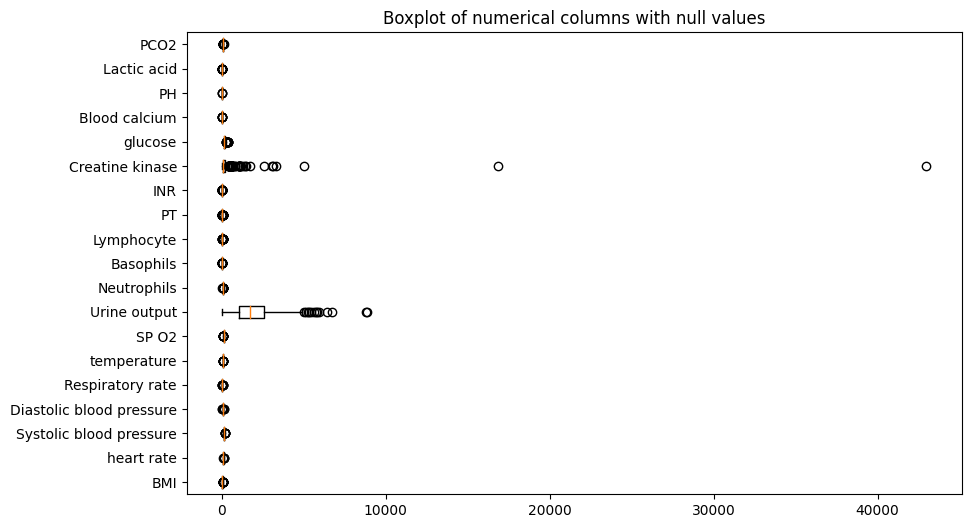

In [11]:
# analyze the behavior of the values in the columns with null values
col_null = [col for col in num_ft if x[col].isnull().sum() > 0]
x_not_null = x.dropna(subset=col_null)
# create the boxplot graph
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(x_not_null[col_null].values, vert=False)
ax.set_title('Boxplot of numerical columns with null values')
ax.set_yticklabels(col_null)
plt.show()

In [12]:
# use the median to fill in the null values of columns with outliers
x["Urine output"] = x["Urine output"].fillna(x["Urine output"].median())
x["Creatine kinase"] = x["Creatine kinase"].fillna(x["Creatine kinase"].median())
x = x.fillna(df.mean()) # use the mean to fill in the other null value columns

In [13]:
df = pd.concat([y,x],axis=1)

In [14]:
df.head()

,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,0.0,72,1,37.588179,0,0,0,1,1,0,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,0.0,75,2,30.188278,0,0,0,0,1,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,0.0,83,2,26.572634,0,0,0,0,1,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,0.0,43,2,83.264629,0,0,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,0.0,75,2,31.824842,1,0,0,0,1,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


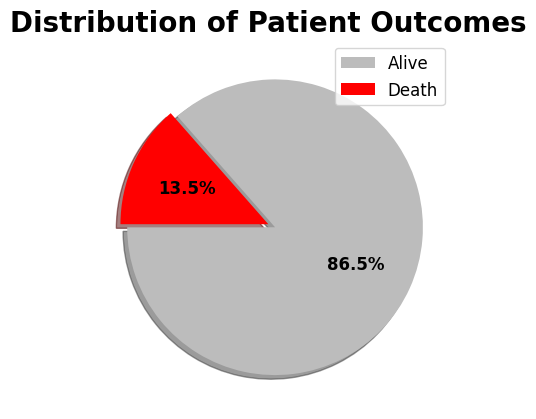

In [15]:
# checking the number of death and life patients 
plt.pie(df.outcome.value_counts(), explode=(0.05, 0), autopct='%1.1f%%', 
        startangle=180, colors=colors, shadow=True, textprops=textprops)
plt.title('Distribution of Patient Outcomes', fontsize=20, fontweight='bold')
# adding legend
plt.legend(labels=['Alive', 'Death'], loc='best', fontsize=12)
plt.show()
# more than 13% patients are died in the hospital 
# data is highly imbalance

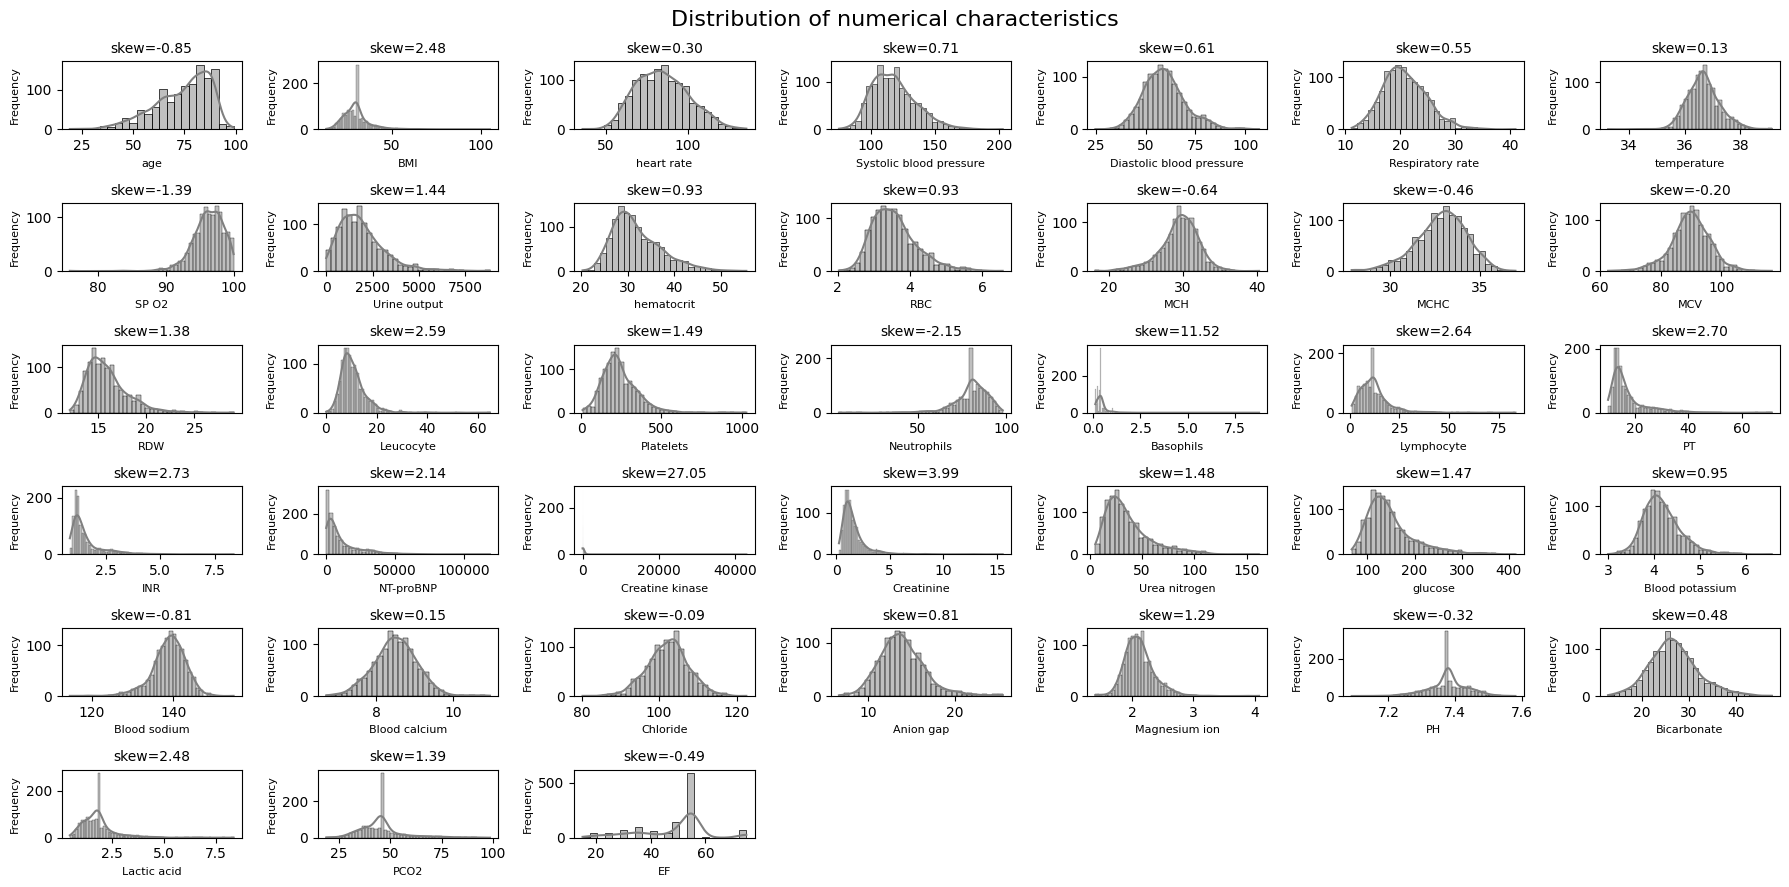

In [16]:
# checking numerical features distribution
plt.figure(figsize = (18, 9))
plt.suptitle('Distribution of numerical characteristics', fontsize=16)
for i in range(len(num_ft)):
  ax = plt.subplot(6, 7, i+1)
  sns.histplot(df[num_ft[i]], color='gray', kde=True)
  ax.set_title(f"skew={df[num_ft[i]].skew():.2f}", fontsize=10)
  ax.set_xlabel(num_ft[i], fontsize=8)
  ax.set_ylabel('Frequency', fontsize=8)
    
plt.tight_layout()
plt.show()
#  it is observed that most of the predictor variables are normally distributed.

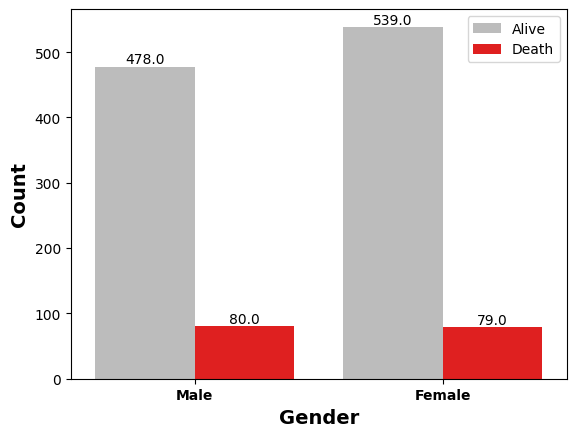

In [17]:
sns.countplot(data=df, x='gendera', hue='outcome', palette=colors)
plt.xlabel('Gender', fontsize=14, weight='bold')
plt.ylabel('Count', fontsize=14, weight='bold')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'], weight='bold')
plt.legend(labels=['Alive', 'Death'])

# add labels on each bar
for bar in plt.gca().containers:
    label = [f"{h.get_height()}" for h in bar]
    plt.bar_label(bar, labels=label, label_type='edge')
plt.show()

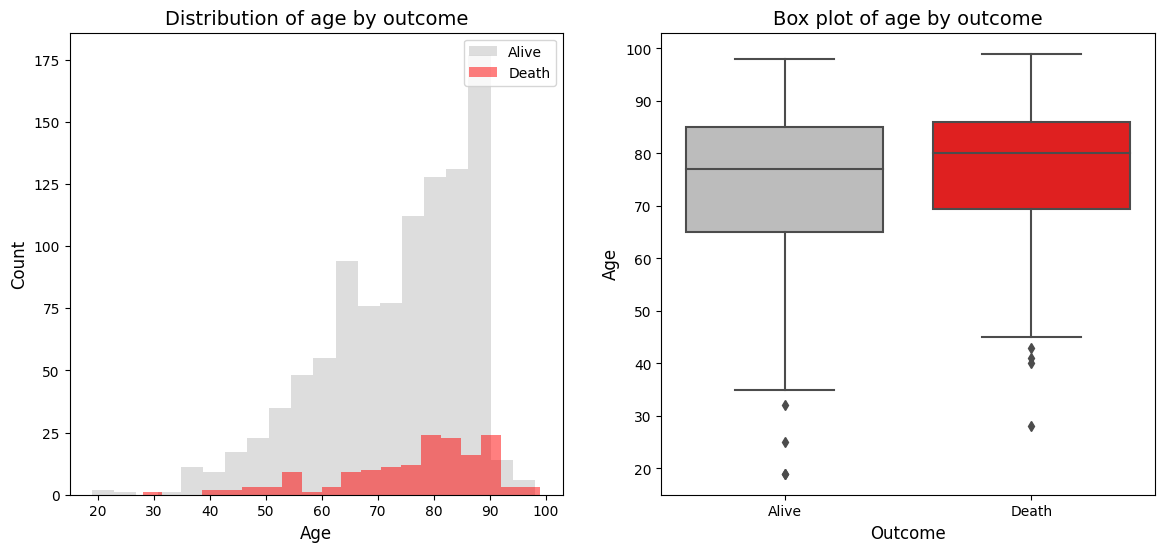

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.hist(df[df['outcome'] == 0]['age'], bins=20, alpha=0.5, color=colors[0], label='0')
ax1.hist(df[df['outcome'] == 1]['age'], bins=20, alpha=0.5, color=colors[1], label='1')
ax1.set_xlabel('Age', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.legend(labels=['Alive','Death'], loc='upper right')
ax1.set_title('Distribution of age by outcome', fontsize=14)

sns.boxplot(data=df, x='outcome', y='age', ax=ax2, palette=colors)
ax2.set_xlabel('Outcome', fontsize=12)
ax2.set_ylabel('Age', fontsize=12)
ax2.set_xticklabels(['Alive', 'Death'])
ax2.set_title('Box plot of age by outcome', fontsize=14)

plt.show()
# 88-89 age group are most in the hospital, also most deaths in that group
# age increased the number of deaths

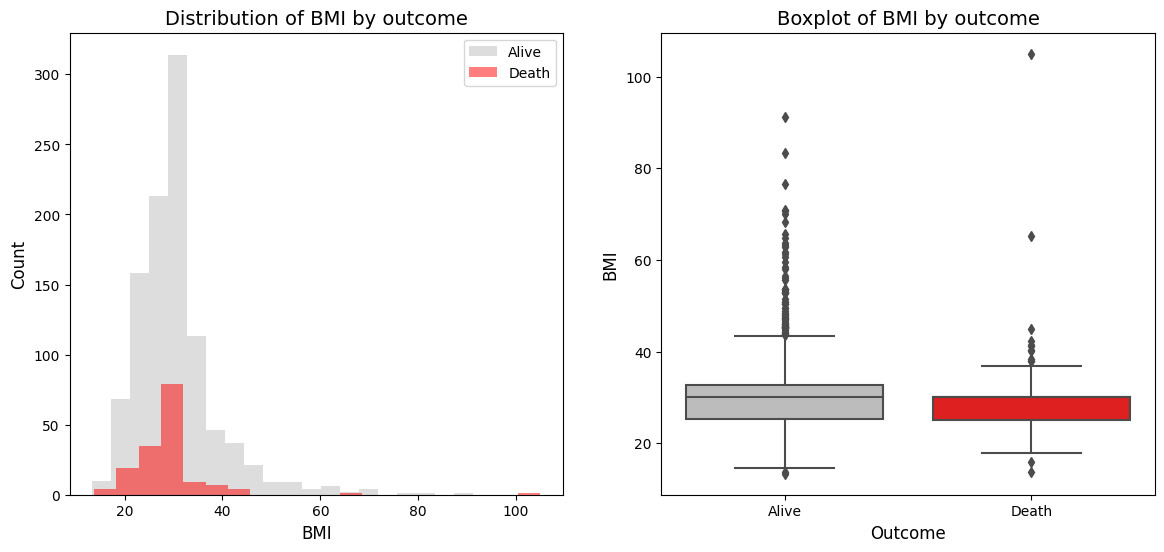

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.hist(df[df['outcome'] == 0]['BMI'], bins=20, alpha=0.5, color=colors[0], label='0')
ax1.hist(df[df['outcome'] == 1]['BMI'], bins=20, alpha=0.5, color=colors[1], label='1')
ax1.set_xlabel('BMI', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.legend(labels=['Alive','Death'], loc='upper right')
ax1.set_title('Distribution of BMI by outcome', fontsize=14)

sns.boxplot(data=df, x='outcome', y='BMI', ax=ax2, palette=colors)
ax2.set_xlabel('Outcome', fontsize=12)
ax2.set_ylabel('BMI', fontsize=12)
ax2.set_xticklabels(['Alive', 'Death'])
ax2.set_title('Boxplot of BMI by outcome', fontsize=14)

plt.show()
# 25-29 range have a sharp rise in n of deaths
# 25- 29 -> overweight
# 30+ -> obese

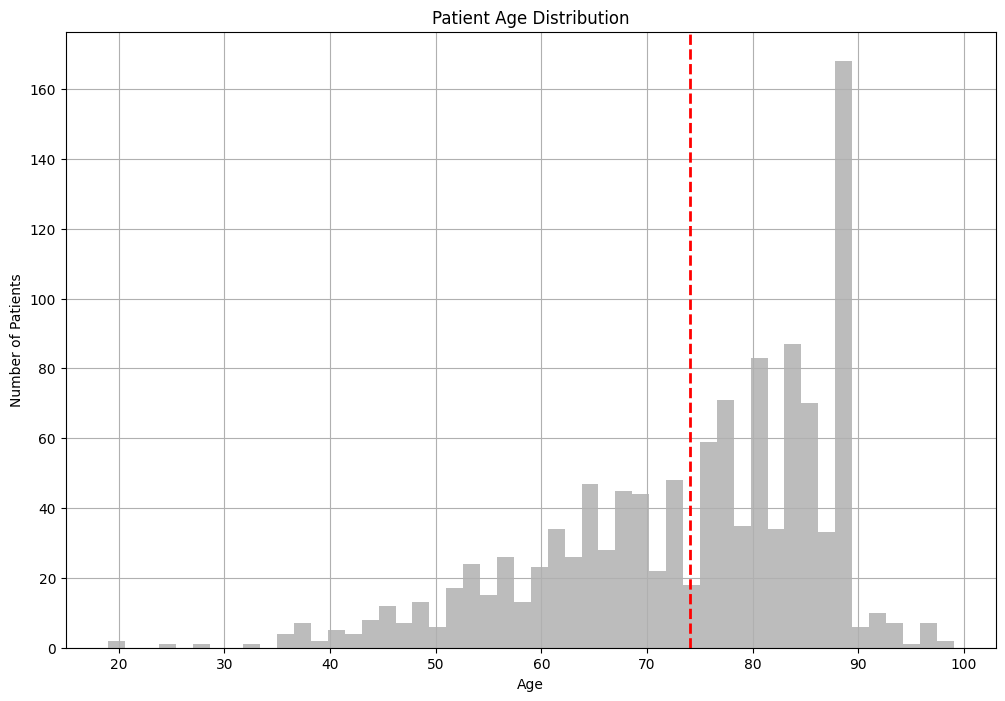

In [20]:
df.age.hist(bins=50, color=colors[0], figsize=(12,8))
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Patient Age Distribution')
plt.axvline(df.age.mean(), color=colors[1], linestyle='dashed', linewidth=2)
plt.show()
# 88-89 age group are most in the hospital

COMORBIDITIES

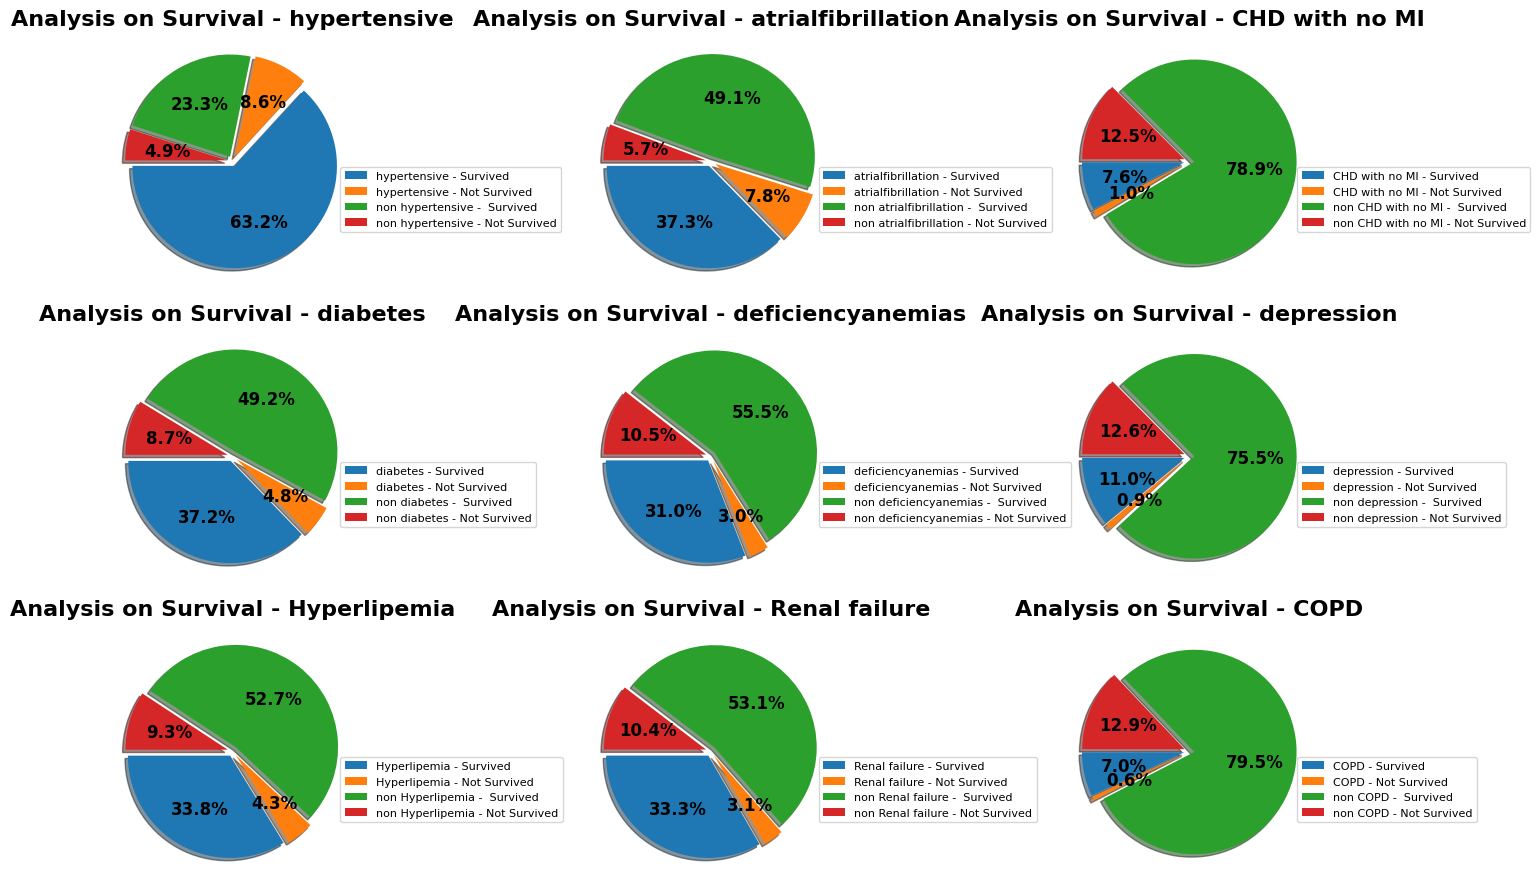

In [21]:
variables = ['hypertensive', 'atrialfibrillation', 'CHD with no MI', 'diabetes', 
             'deficiencyanemias', 'depression', 'Hyperlipemia', 'Renal failure', 'COPD']

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 9))

for i, var in enumerate(variables):
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    
    values = df.loc[:, [var, "outcome"]].value_counts().reindex([(1, 0), (1, 1), (0, 0), (0, 1)]).values
    ax.pie(values, autopct='%1.1f%%', explode=(0.05, 0.05, 0.05, 0.05), 
           startangle=180, shadow=True, textprops=textprops)
    ax.set_title(f"Analysis on Survival - {var}", fontsize=16, fontweight='bold')
    ax.legend(labels=[f"{var} - Survived", f"{var} - Not Survived", f"non {var} -  Survived", f"non {var} - Not Survived"], 
              loc='best', bbox_to_anchor=(0.9, 0.5), fontsize=8)

plt.tight_layout()
plt.show()

Observe the Correlation of the Comorbidities with dependent variable (outcome)


Highly correlated pairs: [('hematocrit', 'RBC'), ('MCH', 'MCV'), ('Neutrophils', 'Lymphocyte'), ('PT', 'INR')]


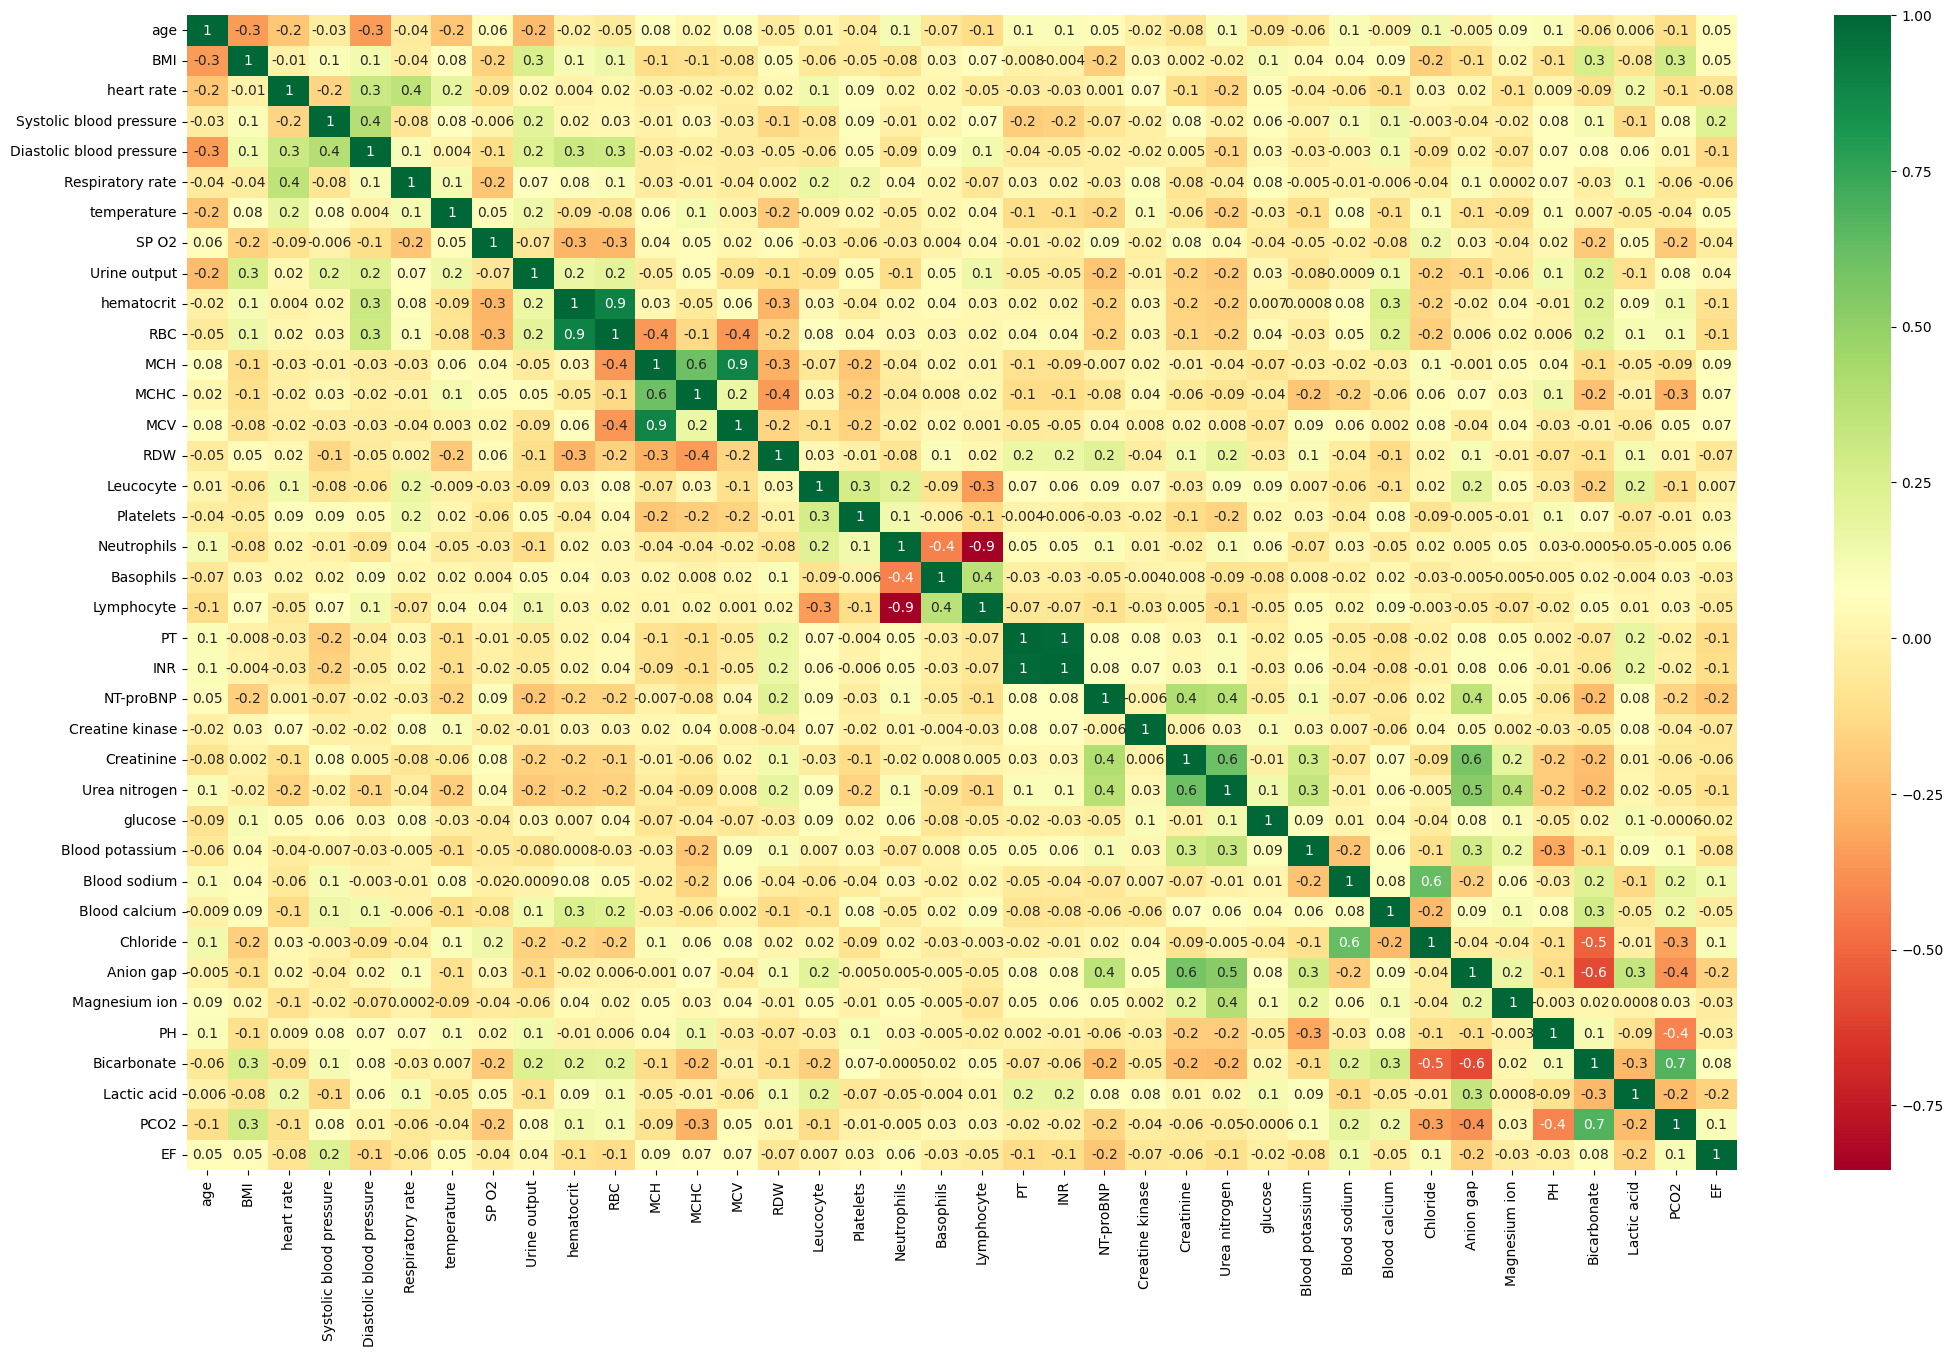

In [22]:
corr = df[num_ft].corr()
plt.figure(figsize=(25,15))
sns.heatmap(corr, annot=True, cmap='RdYlGn', fmt='.0g');

high_corr_var=np.where(corr.abs()>0.8)
high_corr_pairs=[(corr.abs().columns[x],corr.abs().columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
print(f"Highly correlated pairs: {high_corr_pairs}")

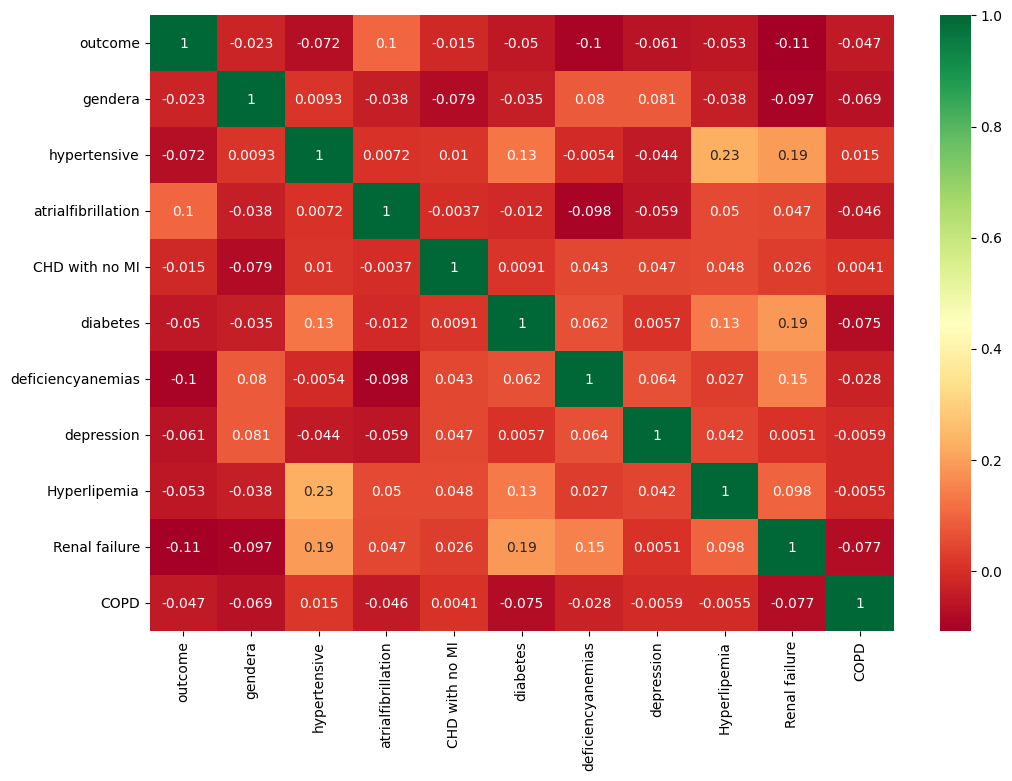

In [23]:
corr = df[["outcome"]+cat_ft].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='RdYlGn');
# no multicollinearity problem

Train Test Split 


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)
print(x_train.shape, x_test.shape)

(823, 48) (353, 48)


In [25]:
from xgboost import XGBClassifier, plot_tree, plot_importance

In [26]:
xgb = XGBClassifier(random_state=42)

In [27]:
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [28]:
pred = xgb.predict(x_test)

Model Evaluation

In [29]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [30]:
cf = confusion_matrix(y_test, pred)
cf

array([[293,   6],
       [ 40,  14]], dtype=int64)

In [31]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93       299
         1.0       0.70      0.26      0.38        54

    accuracy                           0.87       353
   macro avg       0.79      0.62      0.65       353
weighted avg       0.85      0.87      0.84       353



In [32]:
y_train.value_counts()

0.0    718
1.0    105
Name: outcome, dtype: int64

In [33]:
y_test.value_counts()

0.0    299
1.0     54
Name: outcome, dtype: int64

In [34]:
m = np.concatenate((y_test.values.reshape(len(y_test),1), pred.reshape(len(pred),1)),1)

In [35]:
m = pd.DataFrame(m, columns=['y_test', 'y_pred'])

In [36]:
m.head(20)

,y_test,y_pred
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0


In [37]:
from imblearn.over_sampling import SMOTE

In [38]:
X = x.copy()
Y = y.copy()

In [39]:
smote = SMOTE(sampling_strategy='minority')

In [40]:
x_s, y_s = smote.fit_resample(X, Y)

In [41]:
X_train,X_test,Y_train,Y_test = train_test_split(x_s, y_s, test_size=0.3, random_state=42)

In [42]:
xgb = XGBClassifier(random_state=42, seed=42)

In [43]:
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [44]:
pred_b = xgb.predict(X_test)

In [45]:
con = confusion_matrix(Y_test, pred_b)

con

array([[289,  21],
       [ 15, 286]], dtype=int64)

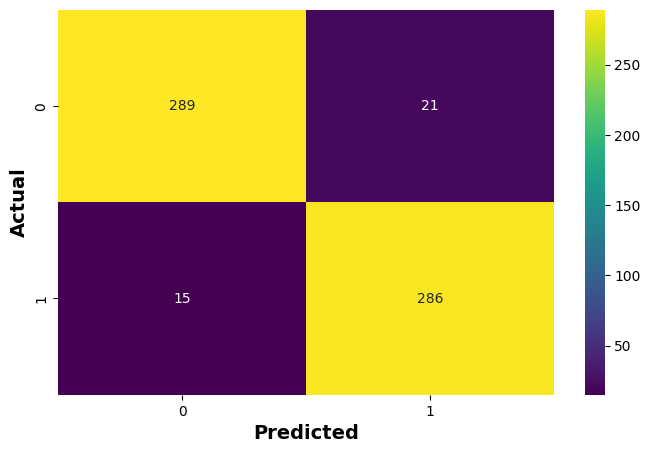

In [46]:
plt.figure(figsize=(8,5))
sns.heatmap(con, annot=True, cmap='viridis', fmt='.0f');
plt.xlabel('Predicted', fontsize=14, weight='bold')
plt.ylabel('Actual', fontsize=14, weight='bold')
plt.show()

In [47]:
print(classification_report(Y_test, pred_b))

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94       310
         1.0       0.93      0.95      0.94       301

    accuracy                           0.94       611
   macro avg       0.94      0.94      0.94       611
weighted avg       0.94      0.94      0.94       611



In [48]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93       299
         1.0       0.70      0.26      0.38        54

    accuracy                           0.87       353
   macro avg       0.79      0.62      0.65       353
weighted avg       0.85      0.87      0.84       353



In [49]:
from sklearn.metrics import RocCurveDisplay, precision_recall_curve


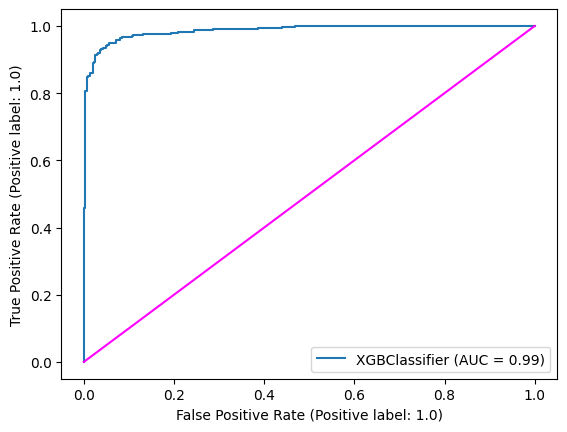

In [50]:
RocCurveDisplay.from_estimator(xgb, X_test, Y_test)
plt.plot([0,1], [0,1], color='magenta', ls='-')

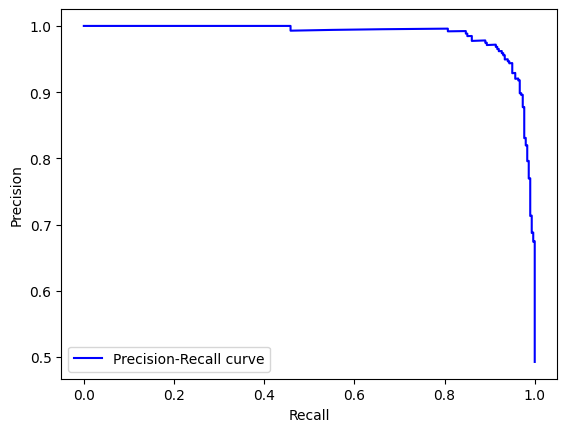

In [51]:
probas = xgb.predict_proba(X_test)
precision, recall, thresholds = precision_recall_curve(Y_test, probas[:, 1])
plt.plot(recall, precision, color='b', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower left")
plt.show()

In [52]:
imp = xgb.feature_importances_

imp

array([0.01153532, 0.01720035, 0.01368527, 0.05342142, 0.01132875,
       0.04827406, 0.02747184, 0.05101448, 0.07426606, 0.02504172,
       0.1193037 , 0.03900005, 0.0127509 , 0.00267929, 0.0148705 ,
       0.01280696, 0.00600131, 0.00995621, 0.02679533, 0.00578068,
       0.0077983 , 0.00370412, 0.00944302, 0.006972  , 0.01743988,
       0.01988729, 0.01398528, 0.008216  , 0.01868401, 0.01184   ,
       0.01166383, 0.0080997 , 0.01129842, 0.01086147, 0.00838005,
       0.06885558, 0.00802994, 0.01230993, 0.01375238, 0.01691309,
       0.00489757, 0.02046516, 0.00610784, 0.01445662, 0.0413901 ,
       0.01927537, 0.00908197, 0.01300684], dtype=float32)

In [53]:
fi = pd.Series(imp, index=X.columns)
fi.sort_values(ascending=False)

Renal failure               0.119304
depression                  0.074266
Urea nitrogen               0.068856
hypertensive                0.053421
deficiencyanemias           0.051014
CHD with no MI              0.048274
Bicarbonate                 0.041390
COPD                        0.039000
diabetes                    0.027472
Urine output                0.026795
Hyperlipemia                0.025042
Anion gap                   0.020465
Leucocyte                   0.019887
Lactic acid                 0.019275
Basophils                   0.018684
RDW                         0.017440
gendera                     0.017200
Blood calcium               0.016913
Diastolic blood pressure    0.014871
PH                          0.014457
Platelets                   0.013985
Blood sodium                0.013752
BMI                         0.013685
EF                          0.013007
Respiratory rate            0.012807
heart rate                  0.012751
Blood potassium             0.012310
L

<Axes: >

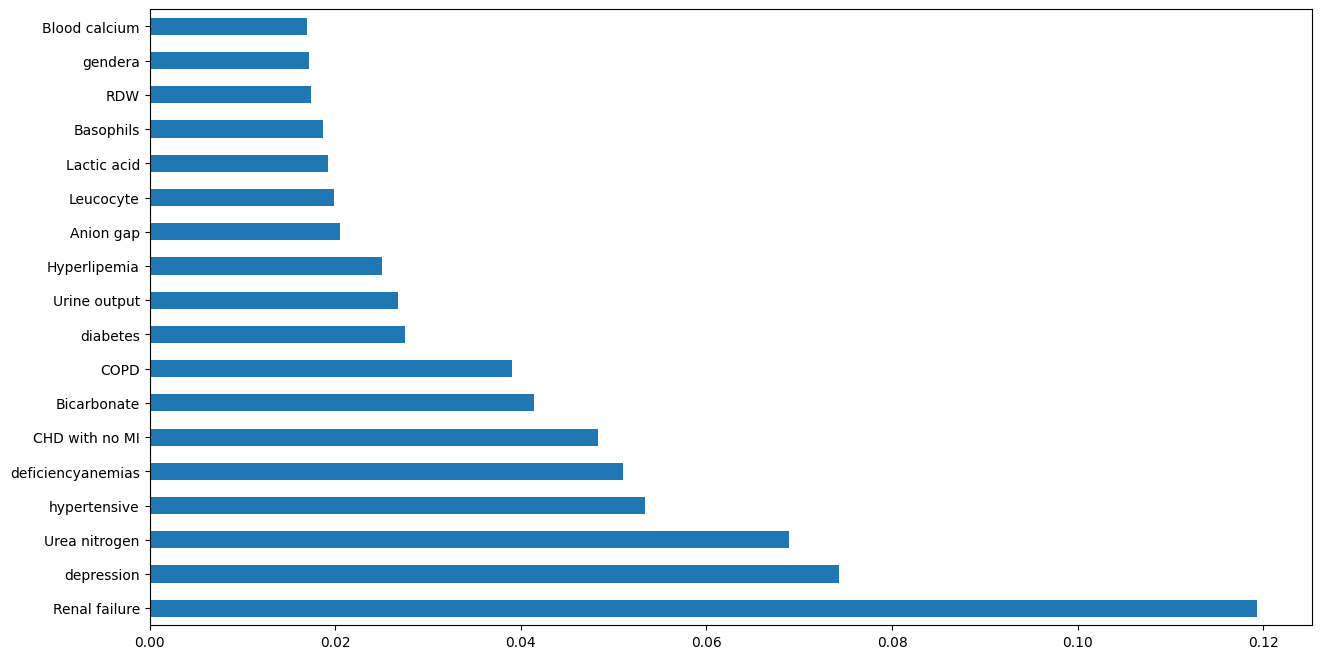

In [54]:
plt.figure(figsize=(15,8))
fi.nlargest(n=18).plot(kind='barh')